In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [29]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [30]:
print(len(X_train))
print(len(X_test))

60000
10000


In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [33]:
X_train=X_train/255.0
X_test=X_test/255.0

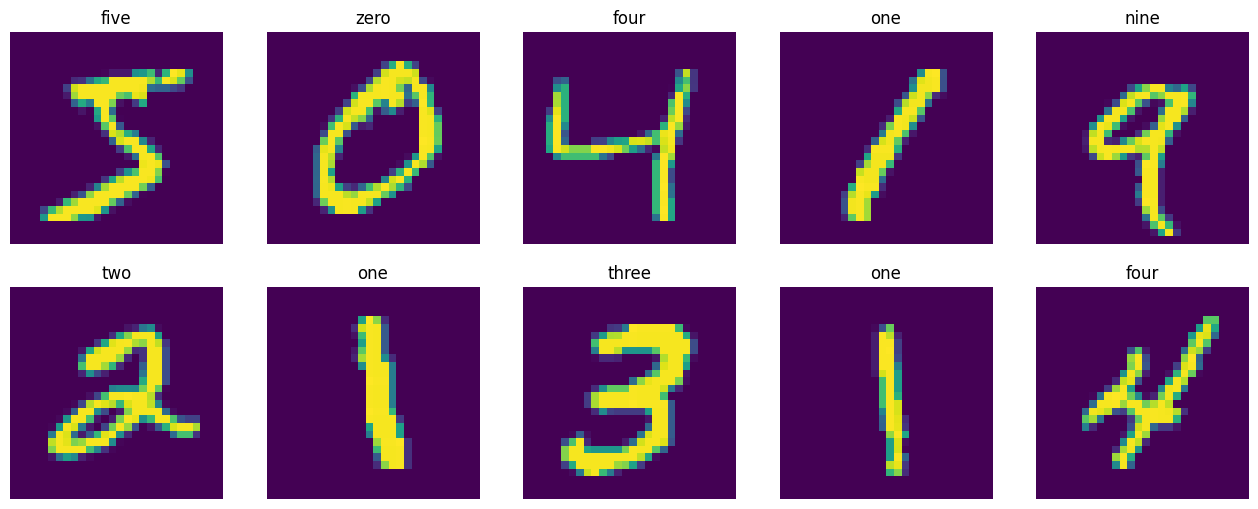

In [34]:
plt.figure(figsize=(16,16))
j=1
for i in range(0,10):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title(class_names[y_train[i]])

In [35]:
X_train = np.expand_dims(X_train, axis=-1)

In [36]:
X_train.shape

(60000, 28, 28, 1)

In [37]:
model=Sequential()

In [38]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1), padding='same'))
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((3,3)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 9, 9, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2073 - accuracy: 0.9365 - val_loss: 0.0632 - val_accuracy: 0.9809
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0589 - val_accuracy: 0.9813
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0443 - val_accuracy: 0.9874
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0397 - val_accuracy: 0.9891
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0397 - val_accuracy: 0.9879
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0370 - val_accuracy: 0.9895
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0454 - val_accuracy:

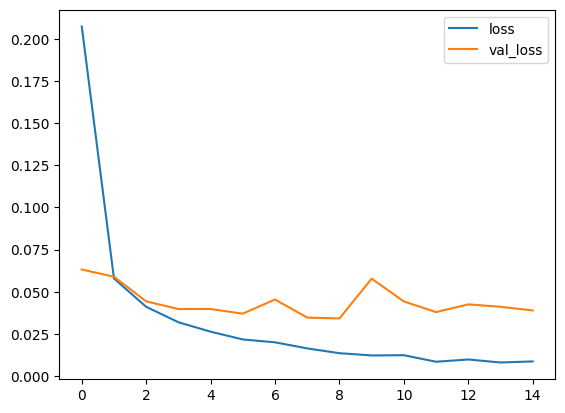

In [42]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

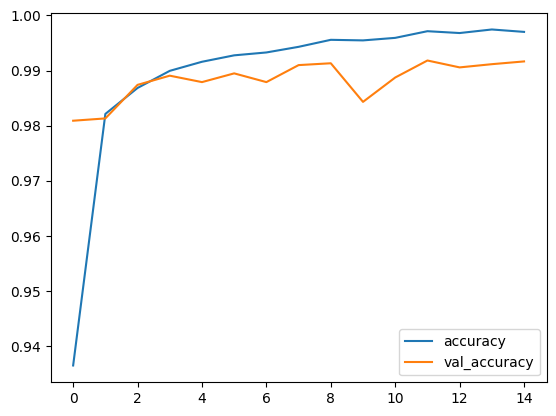

In [43]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

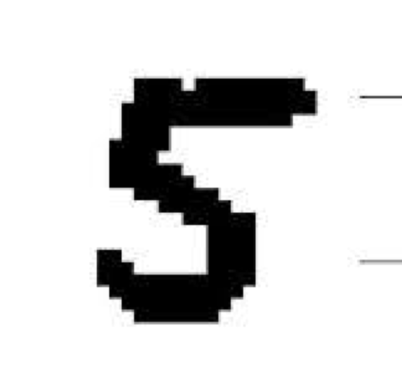

1/1 [==============================] - 0s 29ms/step
Predicted Digit: 5


In [52]:
from PIL import Image

# Load the image and convert to grayscale
img = Image.open('/content/download.jpg').convert('L')

# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Resize the image to 28x28 pixels
img = img.resize((28, 28))

# Convert the image to a numpy array and normalize pixel values
img_array = np.array(img) / 255.0

# Reshape the image for model input (add batch and channel dimensions)
img_array = img_array.reshape(1, 28, 28, 1)

# Make prediction
prediction = model.predict(img_array)

# Get the predicted digit
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)


In [54]:
X_test = np.expand_dims(X_test,axis=-1)

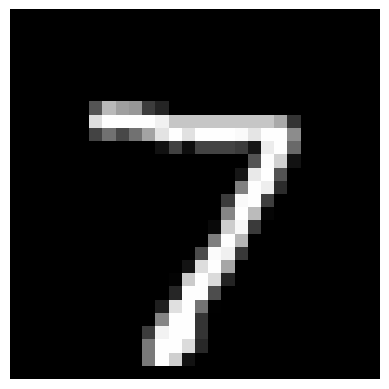

1/1 [==============================] - 0s 35ms/step
Predicted Label: 7


In [55]:
index = 0  # Change this index to visualize different images

# Display the image from the test data
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

# Make prediction on the chosen image
prediction = model.predict(np.expand_dims(X_test[index], axis=0))
predicted_label = np.argmax(prediction)

print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 30ms/step


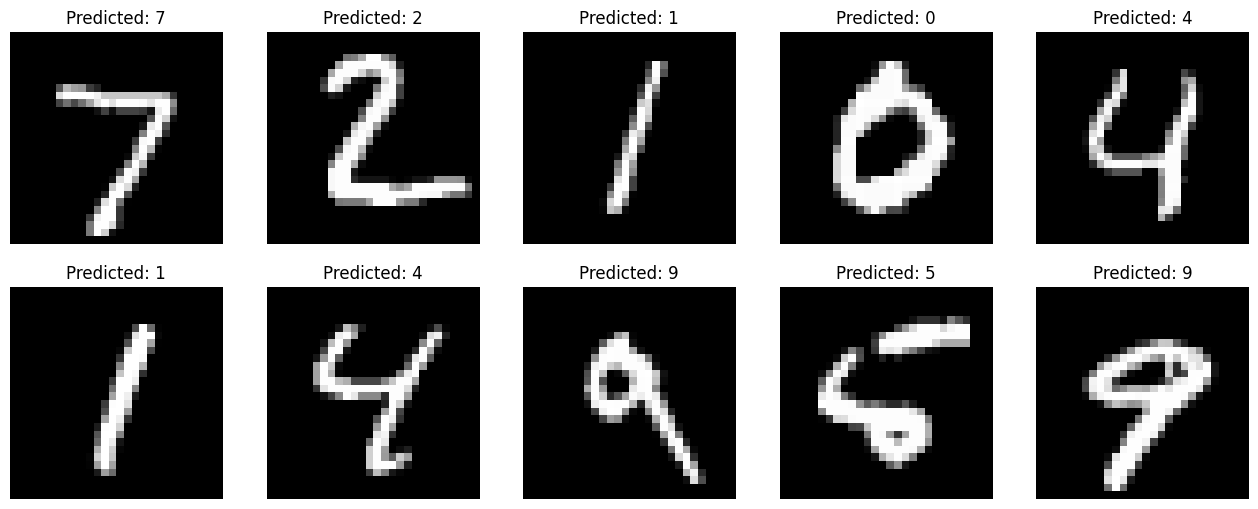

In [56]:
plt.figure(figsize=(16, 16))
j = 1

for i in range(10):
    plt.subplot(5, 5, j)
    j += 1
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Display the image
    plt.axis('off')
    prediction = model.predict(np.expand_dims(X_test[i], axis=0))
    predicted_label = np.argmax(prediction)
    plt.title(f"Predicted: {predicted_label}")  # Add predicted label as title

plt.show()
